# Creating Loan Prediction Model using Machine Learning

#  Here the model uses 11 attributes to predict the whether loan will be granted or not
- Gender
- Marrital Status
- Dependents
- Education
- Self Employement
- Applicant Income
- Co-Applicant Income
- Loan Amount
- Duration of Loan
- Credit History
- Property area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv("train.csv")

In [3]:
dataset.shape

(614, 13)

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [6]:
dataset.Loan_Status=dataset.Loan_Status.map({'Y':1,'N':0})

In [7]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Checking for Missing data in the dataset 

In [8]:
# check for missing data
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Dropping the 'Loan_Status' and storing in another variable for future purpose & combing train and test data to  handle its data at same time

In [9]:
status=dataset.Loan_Status
dataset.drop("Loan_Status",axis=1,inplace=True)
test=pd.read_csv("test.csv")
LoanId=dataset.Loan_ID
data=dataset.append(test)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [10]:
data.shape

(981, 12)

In [11]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

## Label encoding i.e; converting non numeric attributes to numeric so that our model gets trained easily 

In [12]:
#LABEL ENCODING
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Married=data.Married.map({'Yes':1,'No':0})
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
data.Property_Area=data.Property_Area.map({'Rural':0,'Semiurban':1,'Urban':2})

In [13]:
data.Credit_History.size

981

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


<AxesSubplot:>

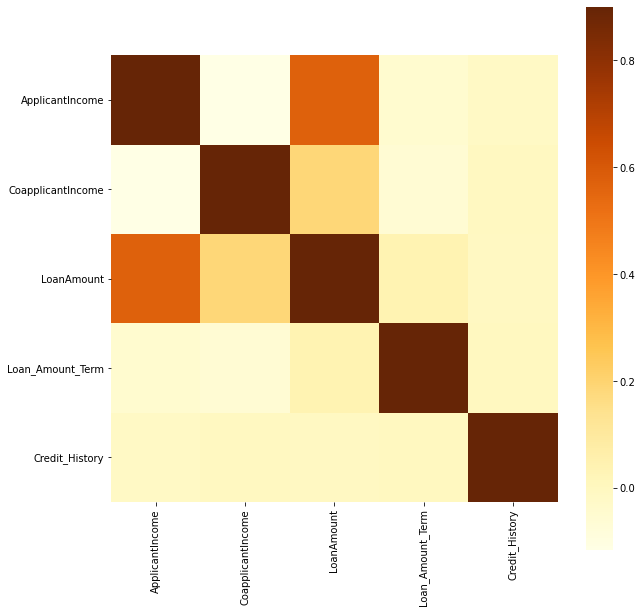

In [15]:
matrix = dataset.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(matrix, vmax = .9, cmap = "YlOrBr", square = True)

In [16]:
#Filling Missing Values
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)
data.Gender.fillna(np.random.randint(0,2),inplace=True)
data.Married.fillna(np.random.randint(0,2),inplace=True)
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)
data.Dependents.fillna(data.Dependents.median(),inplace=True)
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [17]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Dropping 'Loan_ID' column because it is not useful for loan prediction 

In [18]:
#Dropping Loan ID from data
data.drop('Loan_ID',axis=1,inplace=True)

In [19]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


## storing Independent  and Dependent attributes into variables

In [20]:
X=data.iloc[:614]                  #Independent attributes
Y=status                           #Dependent attributes

In [21]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2


In [22]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## spliting data into train and test data 

In [23]:
from sklearn.model_selection import train_test_split                     
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.9,random_state=0)

In [24]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
406,1.0,1.0,0.0,0,0.0,2167,2400.0,115.0,360.0,1.0,2
17,0.0,0.0,0.0,1,0.0,3510,0.0,76.0,360.0,0.0,2
427,1.0,1.0,2.0,1,0.0,5935,0.0,133.0,360.0,1.0,1
21,1.0,1.0,1.0,1,0.0,5955,5625.0,315.0,360.0,1.0,2
460,1.0,1.0,0.0,1,1.0,2083,4083.0,160.0,360.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
277,1.0,1.0,0.0,1,0.0,3103,1300.0,80.0,360.0,1.0,2
9,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1
359,1.0,1.0,3.0,1,0.0,5167,3167.0,200.0,360.0,1.0,1
192,1.0,1.0,0.0,0,0.0,6033,0.0,160.0,360.0,1.0,2


## Training with some ML Algorithms 

### Decision Tree Algorithm 

In [25]:
#Decision Tree Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,Y_train)

y_pred=DTClassifier.predict(X_test)

In [26]:
print("The accuracy through Decision Tree Algorithm is : ",metrics.accuracy_score(y_pred,Y_test))

The accuracy through Decision Tree Algorithm is :  0.7258064516129032


### Naive Bayes Algorithm 

In [27]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train , Y_train)

y_pred=model.predict(X_test)

In [28]:
print("The accuracy through Naive Bayes Algorithm is : ",metrics.accuracy_score(y_pred,Y_test))

The accuracy through Naive Bayes Algorithm is :  0.8225806451612904


### Logistic Regression Algorithm 

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

pred=classifier.predict(X_test)
t=metrics.accuracy_score(pred,Y_test)

In [30]:
print("The accuracy through Logistic Regression Algorithm is : ",metrics.accuracy_score(pred,Y_test))

The accuracy through Logistic Regression Algorithm is :  0.8387096774193549


#### Comparing accuracies from three algorithms

In [31]:
#  The accuracy through Decision Tree Algorithm is :  0.7258064516129032
#  The accuracy through Naive Bayes Algorithm is :  0.8225806451612904
#  The accuracy through Logistic Regression Algorithm is : 0.8387096774193549
#  Because of relatively high accuracy we will be using Logistic Regression Algorithm

## Using "LOGISTIC REGRESSION" for its high accuracy among three algorithms 

### Testing the model using test dataset 

In [32]:
data.iloc[614:,]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
2,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
3,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,0.0,2
4,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,3.0,0,1.0,4009,1777.0,113.0,360.0,1.0,2
363,1.0,1.0,0.0,1,0.0,4158,709.0,115.0,360.0,1.0,2
364,1.0,0.0,0.0,1,0.0,3250,1993.0,126.0,360.0,0.0,1
365,1.0,1.0,0.0,1,0.0,5000,2393.0,158.0,360.0,1.0,0


In [33]:
c=data.iloc[614:,]
p=classifier.predict(c)          

In [34]:
p

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## Saving the model using pickle module 

In [35]:
# Saving the model using pickle
import pickle
file='LoanModelFinal1.pkl'
pickle.dump(classifier, open(file, "wb"))

## Testing with some random input of data 

In [40]:
p=classifier.predict([[1,1,1,1,1,10000,0,1500,240,1,1]])

In [41]:
p

array([1], dtype=int64)